In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model

# importons les données du titanic
df_brut = pd.read_csv('./titanic.csv')

# fonctions pour avoir un aperçu des donneésd
print(df_brut.info())
print(df_brut.describe())
df_brut.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 143.3+ KB
None
            pclass     survived        sibsp        parch        body
count  1309.000000  1309.000000  1309.000000  1309.000000  121.000000
mean      2.294882     0.381971     0.498854

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,"26,5500",E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,"77,9583",D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,"0,0000",A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,"51,4792",C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,"49,5042",NaN,C,NaN,22.0,"Montevideo, Uruguay"


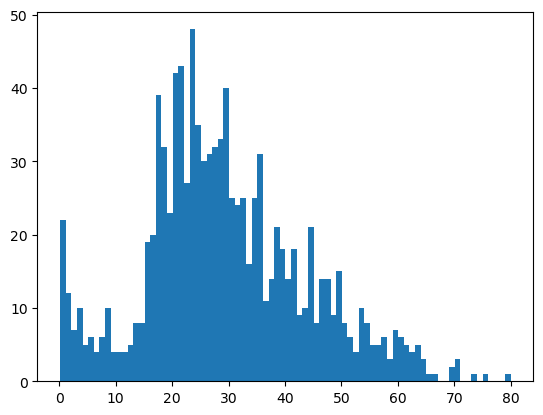

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
embarked      2
dtype: int64

In [26]:
# maintenant on va nettoyer les données.
df = df_brut.copy()
# cabin, boat. body et home.dest sont trop parcellaires pour ne pas polluer notre modèle
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# enlevons le nom, le prix et le numero de ticket aussi, car ces données sont trop complexes et pas si pertinentes
df.drop(['name', 'ticket', 'fare'], axis=1, inplace=True)

# afficher une pyramide des ages
df['age'] =  df['age'].str.replace(',','.') # mon dataset a des virgules de ses morts HAHA LE JOKAIRE
df['age'] =  pd.to_numeric(df['age'])
plt.hist(df.age, 80)
plt.show()
# maintenant on va placer la valeur moyenne de l’age à la place des valeurs manquantes
# df['age'] = df['age'].fillna(df['age'].mean())


df.isnull().sum() # vérifier ou il reste des valeurs manquantes



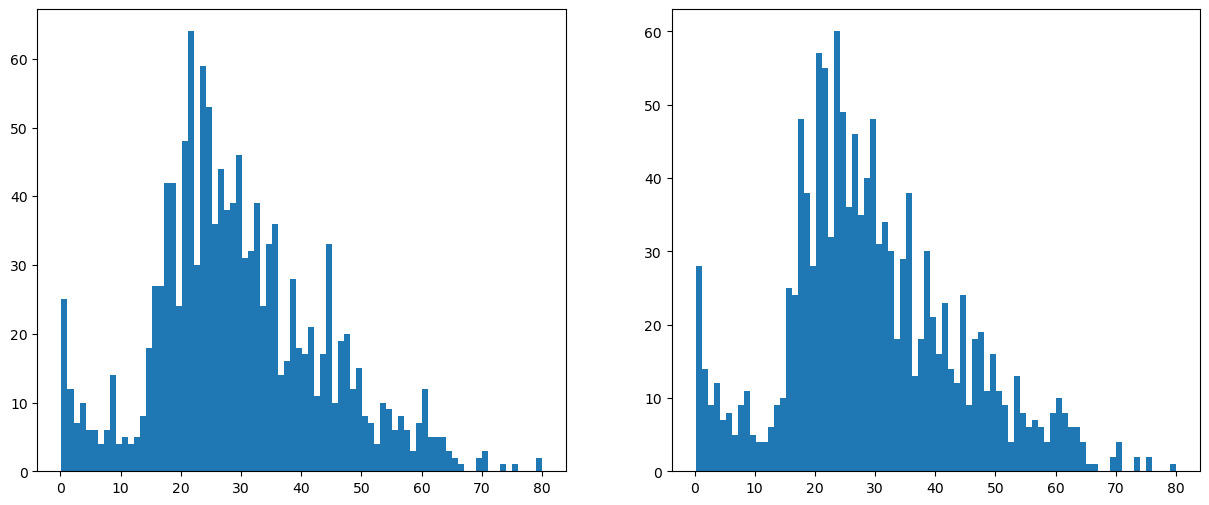

In [27]:
# on va tenter de remplir les vides avec des données plus representatives de la répartition 
# des ages dans le reste des données.

# créer une table de proportions des ages presents dans le jeu de données
proportions = df['age'].value_counts(normalize=True)

# crée une collection de valeurs respectant ces proportions.
# on droit créer une collection de valeurs de la taille de tout le dataset, car la methode de remplacement
# des valeurs manquantes va faire correspondre les index
rd_ages = np.random.choice(proportions.index, size=df['age'].shape[0], p=proportions.values)


df['age3'] = df['age']
df['age3'] = df['age3'].fillna(pd.Series(rd_ages))
plt.figure(figsize=(15,6))
plt.subplot(1,2,2)
plt.hist(df.age3, 80)

# autre manière : la méthode ffill permet de simplement copier la précédente valeur
df['age2'] = df['age']
df['age2'] = df['age2'].fillna(method='ffill')
plt.subplot(1,2,1)
plt.hist(df.age2, 80)
plt.show()

In [28]:

df = df.drop(['age2', 'age3'], axis=1)
df['age'] = df['age'].fillna(method='ffill')

df

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,2,S
2,1,0,female,2.0000,1,2,S
3,1,0,male,30.0000,1,2,S
4,1,0,female,25.0000,1,2,S
...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,C
1305,3,0,female,14.5000,1,0,C
1306,3,0,male,26.5000,0,0,C
1307,3,0,male,27.0000,0,0,C


In [29]:
#Pour embarked, on voir que la répartition est très assymetrique
print(df['embarked'].value_counts(dropna=False))

df_class = df.groupby('embarked')
print(df_class['pclass'].value_counts())
# il est difficile de voir une relation entre le quai d’embarquement et la classe des passagers.
# completons à 'S'
df['embarked'] = df['embarked'].fillna('S')

# sur les données qui restent, combien de personnes ont survécu ?
df[df['survived'] == 1].shape[0] / df.shape[0]


S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64
embarked  pclass
C         1         141
          3         101
          2          28
Q         3         113
          2           7
          1           3
S         3         495
          2         242
          1         177
Name: pclass, dtype: int64


0.3819709702062643

In [30]:
# séparation du sexe et du quai d’embarquement
df = pd.get_dummies(df, columns=['sex', 'embarked', 'pclass'])
print(df.head(15))


    survived      age  sibsp  parch  sex_female  sex_male  embarked_C  \
0          1  29.0000      0      0           1         0           0   
1          1   0.9167      1      2           0         1           0   
2          0   2.0000      1      2           1         0           0   
3          0  30.0000      1      2           0         1           0   
4          0  25.0000      1      2           1         0           0   
5          1  48.0000      0      0           0         1           0   
6          1  63.0000      1      0           1         0           0   
7          0  39.0000      0      0           0         1           0   
8          1  53.0000      2      0           1         0           0   
9          0  71.0000      0      0           0         1           1   
10         0  47.0000      1      0           0         1           1   
11         1  18.0000      1      0           1         0           1   
12         1  24.0000      0      0           1    

In [31]:
# utilisation d’un modèle de classification.

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

xtrain, xtest, ytrain, ytest = train_test_split(df.drop('survived', axis=1), df['survived'], test_size=0.25)

# Normaliser les données entre 0 et 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(xtrain)
X_test = scaler.transform(xtest)

print(X_train)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, ytrain)
model.score(X_train, ytrain)

[[0.01989488 0.125      0.11111111 ... 0.         0.         1.        ]
 [0.34659658 0.         0.         ... 0.         0.         1.        ]
 [0.25863843 0.         0.         ... 0.         0.         1.        ]
 ...
 [0.58534014 0.         0.         ... 0.         0.         1.        ]
 [0.27120388 0.         0.44444444 ... 0.         0.         1.        ]
 [1.         0.         0.         ... 1.         0.         0.        ]]


0.7859327217125383

{'fit_time': array([0.01273441, 0.02053022, 0.01581526, 0.01544094, 0.02364874]),
 'score_time': array([0.02218008, 0.01796007, 0.01886106, 0.02116084, 0.01382351]),
 'test_accuracy': array([0.82741117, 0.75      , 0.78571429, 0.78571429, 0.75510204]),
 'test_f1': array([0.76712329, 0.67973856, 0.7       , 0.73076923, 0.67567568]),
 'test_precision': array([0.8115942 , 0.67532468, 0.765625  , 0.7125    , 0.70422535]),
 'test_recall': array([0.72727273, 0.68421053, 0.64473684, 0.75      , 0.64935065])}
matrice de confusion 
 [[0.82380952 0.17619048]
 [0.29661017 0.70338983]]

 rapport 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       210
           1       0.69      0.70      0.70       118

    accuracy                           0.78       328
   macro avg       0.76      0.76      0.76       328
weighted avg       0.78      0.78      0.78       328



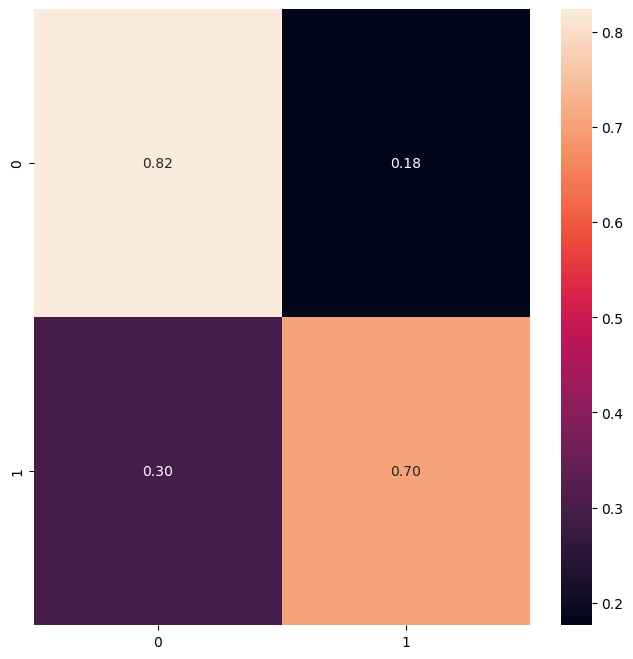

In [32]:
# prédire les valeurs sur le jeu de test

from pprint import pprint

scores = cross_validate(model, X_train, ytrain, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))
pprint(scores)

pred = model.predict(X_test)
confmat = confusion_matrix(ytest, pred)
# normalisation des chiffres de la matrice : 
# indique la proportion des vértables données
cm_norm = confmat / confmat.sum(axis=1, keepdims=True)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", ax=ax)
print('matrice de confusion \n', cm_norm)

report = classification_report(ytest, pred)
print('\n rapport \n', report)

In [33]:
# et si oin complexifiat nos données, en ajoutant une colonne pour chaque valeur des frères et parents

df2 = pd.get_dummies(df, columns=['sibsp', 'parch'])
# print(df2.columns)

df2.to_csv('./titan_df.csv', index=False)

xtr2, xts2, ytr2, yts2 = train_test_split(df2.drop('survived', axis=1), df2['survived'], test_size=0.25)
scaler = MinMaxScaler()
xtr2_n = scaler.fit_transform(xtr2)
xts2_n = scaler.transform(xts2)

model2 = LogisticRegression(max_iter=1000)
model2.fit(xtr2_n, ytr2)

pred2 = model2.predict(xts2_n)
confmat2 = confusion_matrix(yts2, pred2)
cm2_norm = confmat2 / confmat2.sum(axis=1)
print('matrice de confusion \n', cm2_norm)

report2 = classification_report(yts2, pred2)
print('\n rapport \n', report2)

matrice de confusion 
 [[0.87684729 0.2       ]
 [0.21182266 0.656     ]]

 rapport 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       203
           1       0.77      0.66      0.71       125

    accuracy                           0.79       328
   macro avg       0.79      0.77      0.77       328
weighted avg       0.79      0.79      0.79       328



In [34]:
# Bon c’est un peu aléatoire, J’ai parfois des résultats moins bons avec le modèle plus complexe.
# Les valeurs varient beaucoup, de l’ordre de 5% parfois.
# sans doute que mon jeu de test est trop peu fourni.

pred_proba = model2.predict_proba(xts2_n)
print(pred_proba)

[[0.84865232 0.15134768]
 [0.90185623 0.09814377]
 [0.91722033 0.08277967]
 [0.48765954 0.51234046]
 [0.42790414 0.57209586]
 [0.87252461 0.12747539]
 [0.82337732 0.17662268]
 [0.95779943 0.04220057]
 [0.82557286 0.17442714]
 [0.0840686  0.9159314 ]
 [0.45382034 0.54617966]
 [0.89682748 0.10317252]
 [0.78005395 0.21994605]
 [0.3557432  0.6442568 ]
 [0.31602393 0.68397607]
 [0.85523226 0.14476774]
 [0.49291555 0.50708445]
 [0.60997489 0.39002511]
 [0.78956395 0.21043605]
 [0.92188668 0.07811332]
 [0.53534193 0.46465807]
 [0.44580644 0.55419356]
 [0.91065734 0.08934266]
 [0.82737719 0.17262281]
 [0.85646098 0.14353902]
 [0.09636716 0.90363284]
 [0.41524198 0.58475802]
 [0.75411155 0.24588845]
 [0.91060435 0.08939565]
 [0.42204098 0.57795902]
 [0.86227744 0.13772256]
 [0.89234325 0.10765675]
 [0.94179104 0.05820896]
 [0.11747251 0.88252749]
 [0.19599432 0.80400568]
 [0.39015443 0.60984557]
 [0.94293338 0.05706662]
 [0.94129399 0.05870601]
 [0.42790414 0.57209586]
 [0.73781195 0.26218805]


In [35]:
# création fonction pour tester differents modèles : 

def testmodel(datax, datay, model, specific_parameters):
    xtr, xts, ytr, yts = train_test_split(datax, datay)
    scaler = MinMaxScaler()
    xtr_n = scaler.fit_transform(xtr)
    xts_n = scaler.transform(xts)